BWM 320i<br/>
env: phd<br/>
aim: handle data as (x0,u,x1)
- x0: init 7-dim car state<br/>
- u:  input 2-dim(v-delta,a)<br/>
- x1: next 7-dim car state<br/>

We consider a bounded set X := [0, 84]×[0, 6]× [−0.18, 0.18]×[12, 21]×[−0.5, 0.5]×[−0.8, 0.8]×[−0.1, 0.1], and
a quantized input set U := [−0.4, 0.4]×[−4, 4] with a fine quantization parameter

In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import title, legend
import math
import random

from scipy.integrate import solve_ivp

from vehiclemodels.parameters_vehicle2 import parameters_vehicle2
from vehiclemodels.init_st import init_st
from vehiclemodels.vehicle_dynamics_st import vehicle_dynamics_st

In [3]:
p = parameters_vehicle2()

In [4]:
def cal_x1(t,x,uInit):
    f = vehicle_dynamics_st(x,uInit,p)
    return f
    

In [5]:
def cal_vehicle_dynamic(x,u):
    t_span = (0,0.1)
    x_new_st = solve_ivp(fun=lambda t,y:cal_x1(t,y,u),t_span=t_span,y0=x)
    x_new = [x_new_st.y[0][-1],x_new_st.y[1][-1],x_new_st.y[2][-1],x_new_st.y[3][-1],x_new_st.y[4][-1],x_new_st.y[5][-1],x_new_st.y[6][-1]]
    return x_new

In [6]:
x0 = [0,1.5,0,15,0,0,0]
u0 = [0.15,1]

In [7]:
# n: repeat time
import csv

def write_data(x0,u,n):
    data = []
    x_init = x0
    for i in range(n):
        x_next = cal_vehicle_dynamic(x_init,u)
        data.append([x_init,u,x_next])
        
        x_init = x_next
    print("-------")
    print(len(data),len(data[0]),len(data[0][0]))
    # with open("data.txt","w") as f:
    #     for j in data:
    #         f.writelines(str(j)+"\n")
write_data(x0,u0,15)

-------
15 3 7


In [8]:
# 3组 7维数组
# matrix = np.random.random(size=[3,7,1])

def gauss_noise(matrix,mu,sigma):
    channel_size = len(matrix)
    height = len(matrix[0])
    width = len(matrix[0][0])
    noise_matrix = np.random.normal(mu, sigma, size=[channel_size, height, width]).astype(np.float32)
    # print(noise_matrix[1])
    return noise_matrix
   
    # print(">>>added gaussain noise")

# gauss_noise(np.zeros((5,7,1)),0,0.2)


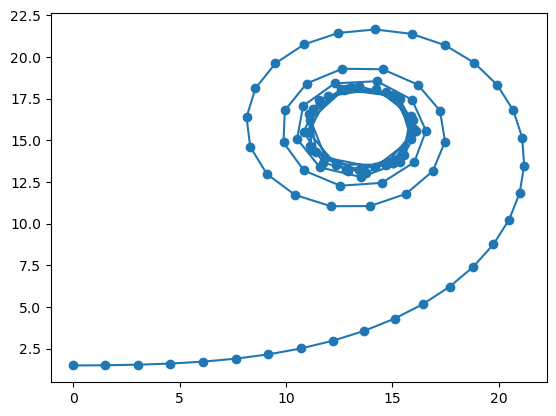

In [16]:
n = 100
# get_next(x0,u,1,n_noise)
def get_next(x0,u,n,w):
    x_data = [x0[0]]
    y_data = [x0[1]]
    x_init = x0
    # noise_matrix = gauss_noise_matrix(np.zeros((n+1,7,1)),1,0.2)
    
    
    
    for i in range(n):
        # n_noise = np.array(noise_matrix[n].tolist()).flatten().tolist()
        x_init_with_noise = np.array(x_init)+np.array(w)
        x_next = cal_vehicle_dynamic(x_init_with_noise,u)
        # if i==0:
        #     print(x_next)
        #     print(np.array(x_next))
        #     print(x_init_with_noise)
        x_data.append(x_next[0])
        y_data.append(x_next[1])
        x_init = x_next
    x_np = np.array(x_data)
    y_np = np.array(y_data)
    plt.scatter(x_np,y_np)
    # print(x_np)
    plt.plot(x_np,y_np)
    # return x_next
    return x_init_with_noise,np.array(x_next)
    
# draw_test(x,u,n)
get_next(x0,u0,100,0.003);

In [10]:
def init_sample():
    x_0 = random.uniform(0,84)
    x_1 = random.uniform(0,6)
    x_2 = random.uniform(-0.18,0.18)
    x_3 = random.uniform(12,21)
    x_4 = random.uniform(-0.5,0.5)
    x_5 = random.uniform(-0.8,0.8)
    x_6 = random.uniform(-0.1,0.1)
    # u_0 = random.uniform(-0.4,0.4)
    # u_1 = random.uniform(-4,4)
    ## 两个变量如何处理
    u_0 = 0
    u_1 = 0
    
    x0 = [x_0,x_1,x_2,x_3,x_4,x_5,x_6]
    u  = [u_0,u_1]
    # print(x0,u)
    return x0,u

# init_sample()

[29.03826179  3.88696108  0.93189377 14.69331688  0.40503613  0.30920791
  1.21971565]
[29.39883246  5.29926956  0.93189377 14.69331688  0.67396741  4.15831753
  0.51390265]


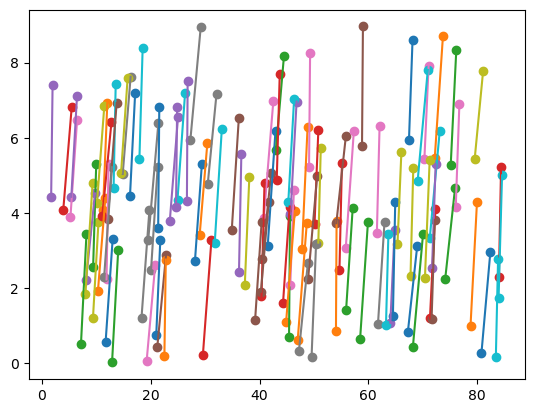

In [17]:
def get_2steps(n):
    with open('output.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["init","next"])
        gauss_noise_matrix = gauss_noise(np.zeros((n+1,7,1)),1,0.2)
        
        for i in range(n):
            x0,u = init_sample()
            n_noise = np.array(gauss_noise_matrix[n].tolist()).flatten().tolist()
            
            data = get_next(x0,u,1,n_noise)
            if i == 0:
                print(data[0])
                print(data[1])
                # print(n_noise)
            writer.writerow([data[0],data[1]])
            # writer.writerow([data[0],data[1],n_noise])
            

get_2steps(100)

In [145]:
# a= np.random.random(size=[2,7,1])
# print(a[1])
# print(a[1].tolist())
# b = a[1].tolist()
# c = np.array(b).flatten().tolist()
# print(c)
# d = np.array(a[1].tolist()).flatten().tolist()
# e = [1,1,1,1,1,1,1]
# print(np.array(d)+np.array(e))

[[0.5208019 ]
 [0.87815233]
 [0.22246272]
 [0.25089061]
 [0.46683743]
 [0.78006278]
 [0.94479769]]
[[0.5208019009064875], [0.8781523290810043], [0.2224627180685983], [0.2508906087400926], [0.46683742586248533], [0.7800627774566623], [0.9447976894346801]]
[0.5208019009064875, 0.8781523290810043, 0.2224627180685983, 0.2508906087400926, 0.46683742586248533, 0.7800627774566623, 0.9447976894346801]
[1.5208019  1.87815233 1.22246272 1.25089061 1.46683743 1.78006278
 1.94479769]


In [74]:
np.zeros((5,7,1))

array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]])